This dataset was taken from <a href="https://www.kaggle.com/andrewmvd/heart-failure-clinical-data">Kaggle</a>

### About this dataset
Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.
Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.

Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats # For Z Score, if we want to remove outliers

sns.set_style('darkgrid')
%matplotlib inline

In [2]:
table = pd.read_csv("heart_failure_clinical_records_dataset.csv")
table

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [3]:
df = table.copy()
df_to_plot = df.copy()
del table

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


All the columns we have are numerical

We have some numeric categorical columns, their values are listed below:

* Sex - Gender of patient Male = 1, Female =0
* Age - Age of patient
* Diabetes - 0 = No, 1 = Yes
* Anaemia - 0 = No, 1 = Yes
* High_blood_pressure - 0 = No, 1 = Yes
* Smoking - 0 = No, 1 = Yes
* DEATH_EVENT - 0 = No, 1 = Yes

Lets check if we have some NaN values

In [5]:
df.isna().sum() # We have zero NaN values

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Lets check how many entries an features we have in our dataframe

In [6]:
df.shape # We have 299 entries an 13 features, which all are numerical

(299, 13)

In [7]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

# EDA

We are going to map our numeric categorical values into non numerical categorical values, this is so we can identify everything a little bit better in our plots, and not see only 1's and 0's

In [8]:
di_sex = {0:"Female", 1:"Male"}
di_smoking = {0:"Non Smoker",1:"Smoker"}
di_diabetes = {0:"Non Diabetic",1:"Diabetic"}
di_anaemia = {0:"Non Anaemia",1:"Anaemia"}
di_high = {0:"Non High Blood Pressure",1:"High Blood Pressure"}
df_to_plot["sex"].replace(di_sex, inplace=True)
df_to_plot["smoking"].replace(di_smoking, inplace=True)
df_to_plot["diabetes"].replace(di_diabetes, inplace=True)
df_to_plot["anaemia"].replace(di_anaemia, inplace=True)
df_to_plot["high_blood_pressure"].replace(di_high, inplace=True)

Our columns are : [ 'age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT' ]
       
Lets check how many DEATH_EVENTS we have

In [9]:
df_to_plot['DEATH_EVENT'].value_counts() #We have more people that didn't die 

0    203
1     96
Name: DEATH_EVENT, dtype: int64

Lets also check if we have more male or female people in our dataset

In [10]:
df_to_plot['sex'].value_counts(normalize=True)*100 #We have more males in our dataset

Male      64.882943
Female    35.117057
Name: sex, dtype: float64

Let's check how may smokers we have

In [11]:
df_to_plot['smoking'].value_counts(normalize=True)*100

Non Smoker    67.892977
Smoker        32.107023
Name: smoking, dtype: float64

In [12]:
df_to_plot['high_blood_pressure'].value_counts(normalize=True)*100

Non High Blood Pressure    64.882943
High Blood Pressure        35.117057
Name: high_blood_pressure, dtype: float64

In [13]:
df_to_plot['anaemia'].value_counts(normalize=True)*100

Non Anaemia    56.856187
Anaemia        43.143813
Name: anaemia, dtype: float64

In [14]:
df_to_plot['diabetes'].value_counts(normalize=True)*100

Non Diabetic    58.19398
Diabetic        41.80602
Name: diabetes, dtype: float64

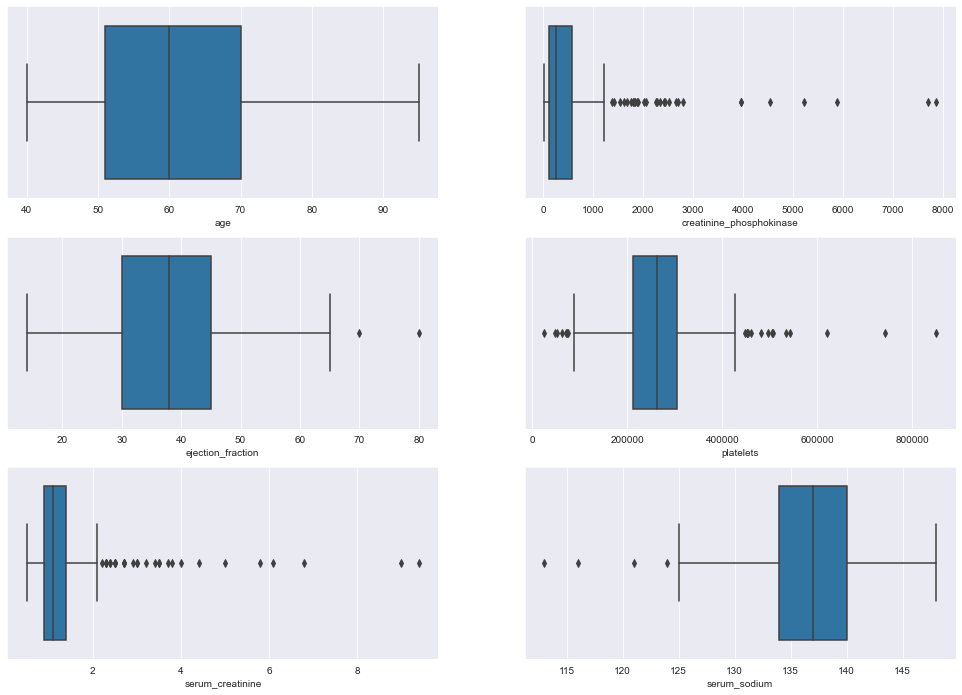

In [15]:
fig, axs = plt.subplots(3,2,figsize=(17,12))

sns.boxplot(ax=axs[0,0],data=df_to_plot,x='age')
sns.boxplot(ax=axs[0,1],data=df_to_plot,x='creatinine_phosphokinase')
sns.boxplot(ax=axs[1,0],data=df_to_plot,x='ejection_fraction')
sns.boxplot(ax=axs[1,1],data=df_to_plot,x='platelets',)
sns.boxplot(ax=axs[2,0],data=df_to_plot,x='serum_creatinine')
sns.boxplot(ax=axs[2,1],data=df_to_plot,x='serum_sodium')

We have outliers in various columns, such as: `['creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium']`, we will keep them for now

In [ ]:
# If we want to remove outliers we wouls use this code

# z = np.abs(stats.zscore(df_to_plot))
# df_to_plot = df_to_plot[(z < 3).all(axis=1)]

# We would need to check if we have a more unbalanced dataset or more balanced

Lets check the distribution of these columns `['sex','smoking','anaemia','diabetes']` have something to do with `['DEATH_EVENT']`

We will do this with `sns.countplot()` and `plt.pie()`, so we can see how these categorical columns affect our target column

But first, we will map these columns `['sex','smoking','anaemia','diabetes']`, so our plots are easier to read

In [16]:
di_sex = {0:"Female", 1:"Male"}
di_smoking = {0:"Non Smoker",1:"Smoker"}
di_diabetes = {0:"Non Diabetic",1:"Diabetic"}
di_anaemia = {0:"Non Anaemia",1:"Anaemia"}
di_high = {0:"Non High Blood Pressure",1:"High Blood Pressure"}
df_to_plot["sex"].replace(di_sex, inplace=True)
df_to_plot["smoking"].replace(di_smoking, inplace=True)
df_to_plot["diabetes"].replace(di_diabetes, inplace=True)
df_to_plot["anaemia"].replace(di_anaemia, inplace=True)
df_to_plot["high_blood_pressure"].replace(di_high, inplace=True)

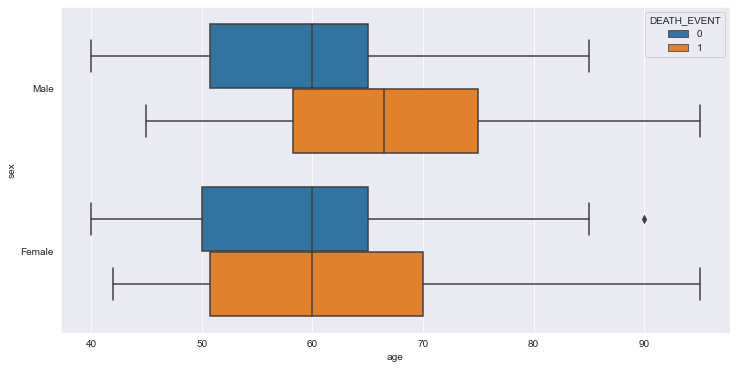

In [17]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_to_plot,x='age',y='sex',hue='DEATH_EVENT')

We can observe that people from the male sex that suffer a fatal heart failure tend to be older than those who not

While the mean in the female sex seems to be the same, those who suffered a fatal heart failure are just a little older than those who didn't

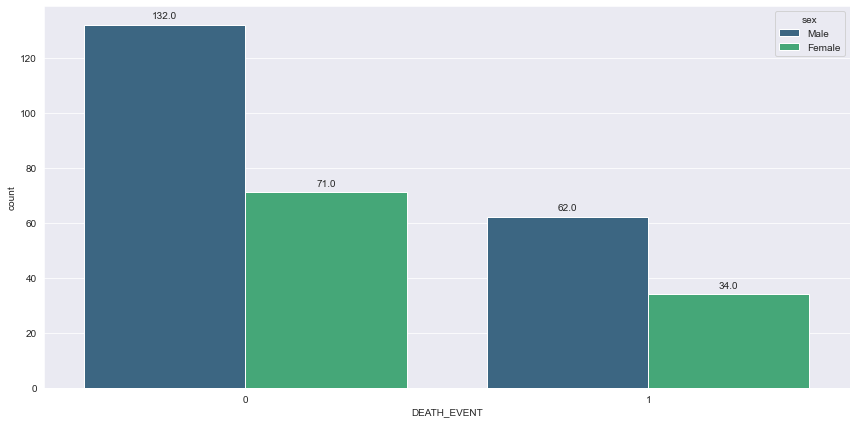

In [18]:
plt.figure(figsize=(12,6))
g = sns.countplot(data=df_to_plot,x='DEATH_EVENT',hue='sex',palette='viridis')
for p in g.patches:
    g.annotate(format(p.get_height(), '.1f'), 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'center', va = 'center', 
        xytext = (0, 9), 
        textcoords = 'offset points')
plt.tight_layout()

We can do a pie chart to observe the percentage of survival rate of `Males` and `Females`

In [19]:
# Obtain "Male" and "Female" subjects
male = df_to_plot[df_to_plot['sex']=="Male"]
female = df_to_plot[df_to_plot['sex']=="Female"]

# Obtain "Male" death events
male_surv = male[male['DEATH_EVENT']==0]
male_not_surv = male[male['DEATH_EVENT']==1]

# Obtain "Female" death events
female_surv = female[female['DEATH_EVENT']==0]
female_not_surv = female[female['DEATH_EVENT']==1]

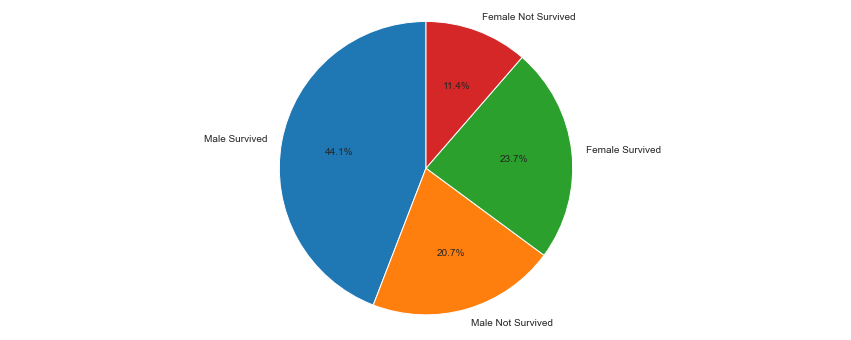

In [20]:
labels = 'Male Survived', 'Male Not Survived', 'Female Survived', 'Female Not Survived'
sizes = [len(male_surv),len(male_not_surv),len(female_surv),len(female_not_surv)]

fig1, ax1 = plt.subplots(figsize=(15,6))
ax1.pie(sizes, labels=labels,autopct='%1.1f%%', startangle=90) 
#colors=['deepskyblue','mediumturquoise','mediumaquamarine','seagreen']
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Here we can see that the male sex has a higher survival rate than the female sex, but we have to acknolwedge that our dataset has more male people than female people, so we have to take that into account

Lets now check how `smoking` affects our `DEATH_EVENT` distribution

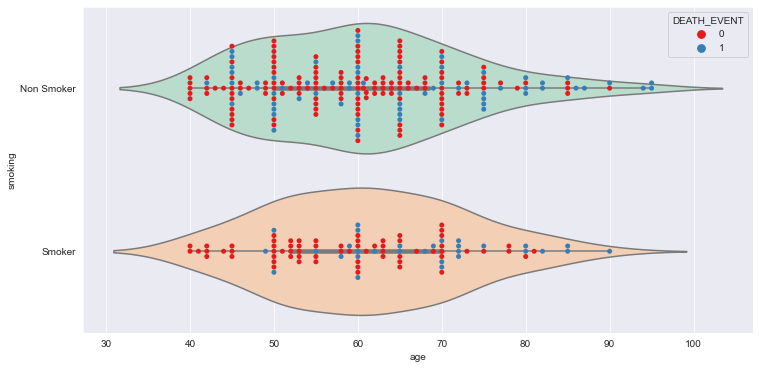

In [21]:
plt.figure(figsize=(12,6))
sns.violinplot(x="age", y="smoking", data=df_to_plot, palette='Pastel2')
sns.swarmplot(data=df_to_plot,x='age',y='smoking',hue='DEATH_EVENT', palette='Set1')

In this `violinplot` and `swarmplot`, we can observe the distribution and kde of `DEATH_EVENT` in smokers and non smokers. We can say that if you're a smoker you'll be between 50 and 70 years of age, and it is almost the same age for non smokers.

We have more observations of `DEATH_EVENT` from non smokers than smokers

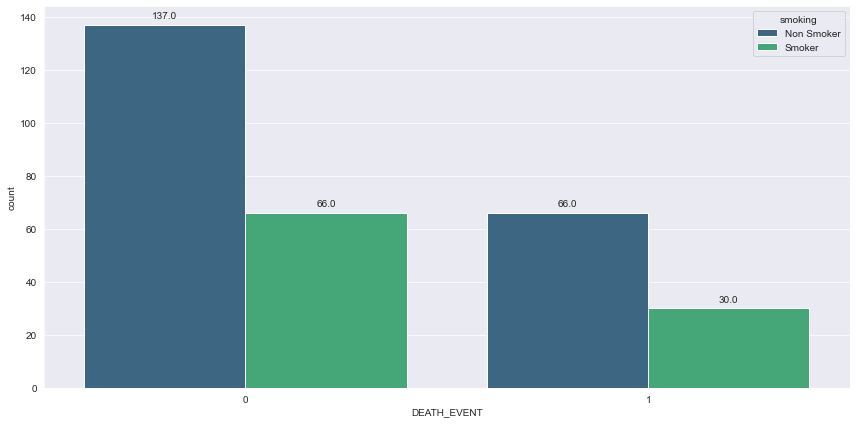

In [22]:
plt.figure(figsize=(12,6))
g = sns.countplot(data=df_to_plot,x='DEATH_EVENT',hue='smoking',palette='viridis')
for p in g.patches:
    g.annotate(format(p.get_height(), '.1f'), 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'center', va = 'center', 
        xytext = (0, 9), 
        textcoords = 'offset points')
plt.tight_layout()

With a pie chart, we can tell what percentage of smokers and non smokers suffered a fatal heart failure

In [23]:
# Obtain "Smoker" and "Non Smoker" subjects
smoking = df_to_plot[df_to_plot['smoking']=="Smoker"]
non_smoking = df_to_plot[df_to_plot['smoking']=="Non Smoker"]

# Obtain "Smoker" death events
smoking_surv = smoking[smoking['DEATH_EVENT']==0]
smoking_not_surv = smoking[smoking['DEATH_EVENT']==1]

# Obtain "Non Smoker" death events
non_smoking_surv = non_smoking[non_smoking['DEATH_EVENT']==0]
non_smoking_not_surv = non_smoking[non_smoking['DEATH_EVENT']==1]

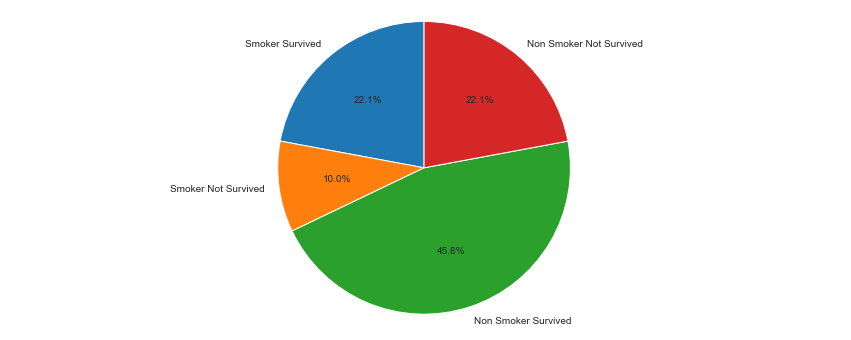

In [24]:
labels = 'Smoker Survived', 'Smoker Not Survived', 'Non Smoker Survived', 'Non Smoker Not Survived'
sizes = [len(smoking_surv),len(smoking_not_surv),len(non_smoking_surv),len(non_smoking_not_surv)]

fig1, ax1 = plt.subplots(figsize=(15,6))
ax1.pie(sizes, labels=labels,autopct='%1.1f%%', startangle=90) 
#colors=['deepskyblue','mediumturquoise','mediumaquamarine','seagreen']
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Here we can see that people that do not smoke have a higher survival rate, but we have to acknolwedge that our dataset has more non smokers than smokers, so we have to take that into account

We can combine the plots made above and observe the count of `DEATH_EVENT ` by being or not a smoker and belonging to a certain sex, we can do this using `sns.catplot()`

<Figure size 864x432 with 0 Axes>

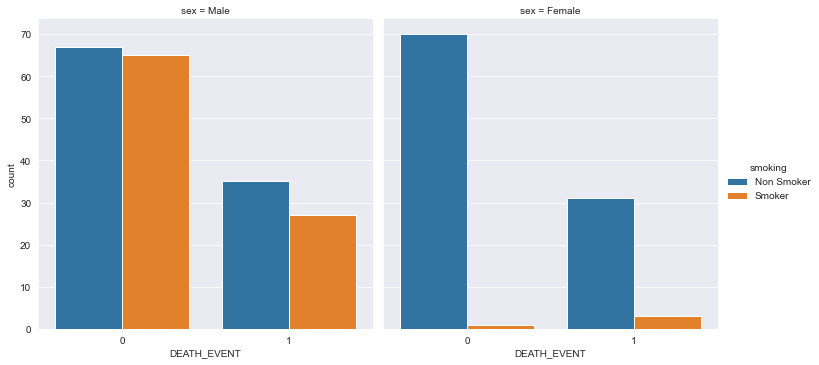

In [25]:
plt.figure(figsize=(12,6))
g = sns.catplot(x="DEATH_EVENT", hue="smoking", col="sex",
                data=df_to_plot, kind="count")

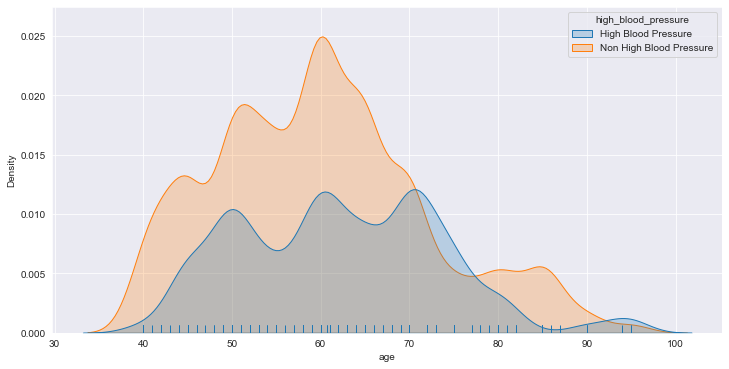

In [26]:
plt.figure(figsize=(12,6))
sns.kdeplot(data=df_to_plot, x="age",shade=True,hue='high_blood_pressure',bw_adjust=0.5)
sns.rugplot(df_to_plot['age'])

Lets see the count of having or not high blood pressure and belonging sex (male/female) against DEATH_EVENT

<Figure size 864x432 with 0 Axes>

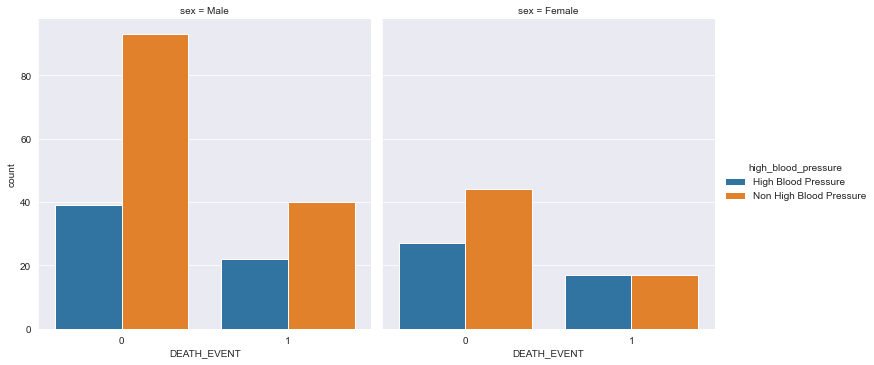

In [27]:
plt.figure(figsize=(12,6))
g = sns.catplot(x="DEATH_EVENT", hue="high_blood_pressure", col="sex",
                data=df_to_plot, kind="count")

We can do a pie chart to observe the survival rates of having or not having blood pressure

In [28]:
# Obtain "High Blood Pressure" and "Non High Blood Pressure" subjects
high_bp = df_to_plot[df_to_plot['high_blood_pressure']=="High Blood Pressure"]
non_high_bp = df_to_plot[df_to_plot['high_blood_pressure']=="Non High Blood Pressure"]

# Obtain "High Blood Pressure" death events
high_bp_surv = high_bp[high_bp['DEATH_EVENT']==0]
high_bp_not_surv = high_bp[high_bp['DEATH_EVENT']==1]

# Obtain "Non High Blood Pressure" death events
non_high_bp_surv = non_high_bp[non_high_bp['DEATH_EVENT']==0]
non_high_bp_not_surv = non_high_bp[non_high_bp['DEATH_EVENT']==1]

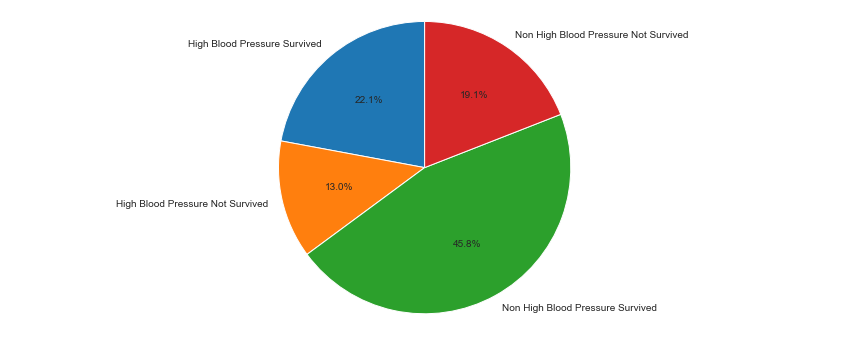

In [29]:
labels = 'High Blood Pressure Survived', 'High Blood Pressure Not Survived', 'Non High Blood Pressure Survived', 'Non High Blood Pressure Not Survived'
sizes = [len(high_bp_surv),len(high_bp_not_surv),len(non_high_bp_surv),len(non_high_bp_not_surv)]

fig1, ax1 = plt.subplots(figsize=(15,6))
ax1.pie(sizes, labels=labels,autopct='%1.1f%%', startangle=90) 
#colors=['deepskyblue','mediumturquoise','mediumaquamarine','seagreen']
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Based on this pie plot, we can say that not having high blood pressure increases the survival rate of a heart failure


Lets check if having anaemia and diabetes have something to do with having a fatal heart failure

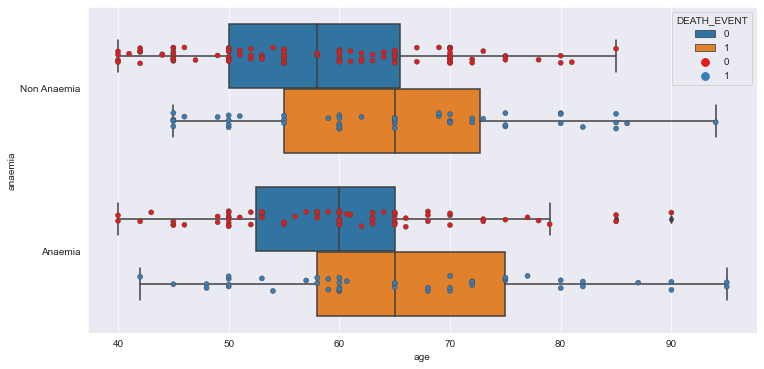

In [30]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(x="age", y="anaemia", data=df_to_plot,hue='DEATH_EVENT')
ax = sns.stripplot(x="age", y="anaemia", hue="DEATH_EVENT",
                   data=df_to_plot,palette='Set1' ,dodge=True, linewidth=0.5)

Subjects that have anaemia and suffered a fatal heart failure tend to be older than those who didn't suffer one, it's almost the same case in non anaemic subjects

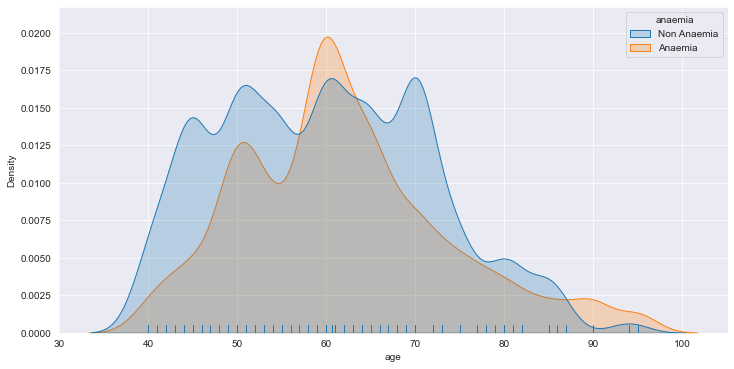

In [31]:
plt.figure(figsize=(12,6))
sns.kdeplot(data=df_to_plot, x="age",shade=True,hue='anaemia',bw_adjust=0.5)
sns.rugplot(df_to_plot['age'])

<Figure size 864x432 with 0 Axes>

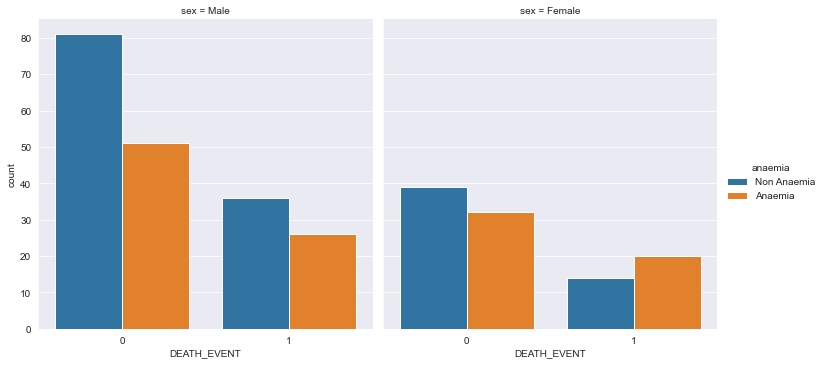

In [32]:
plt.figure(figsize=(12,6))
g = sns.catplot(x="DEATH_EVENT", hue="anaemia", col="sex",
                data=df_to_plot, kind="count")

In [33]:
# Obtain "Anaemia" and "Non Anaemia" subjects
anaemia = df_to_plot[df_to_plot['anaemia']=="Anaemia"]
non_anaemia = df_to_plot[df_to_plot['anaemia']=="Non Anaemia"]

# Obtain "Anaemia" death events
anaemia_surv = anaemia[anaemia['DEATH_EVENT']==0]
anaemia_not_surv = anaemia[anaemia['DEATH_EVENT']==1]

# Obtain "Non Anaemia" death events
non_anaemia_surv = non_anaemia[non_anaemia['DEATH_EVENT']==0]
non_anaemia_not_surv = non_anaemia[non_anaemia['DEATH_EVENT']==1]

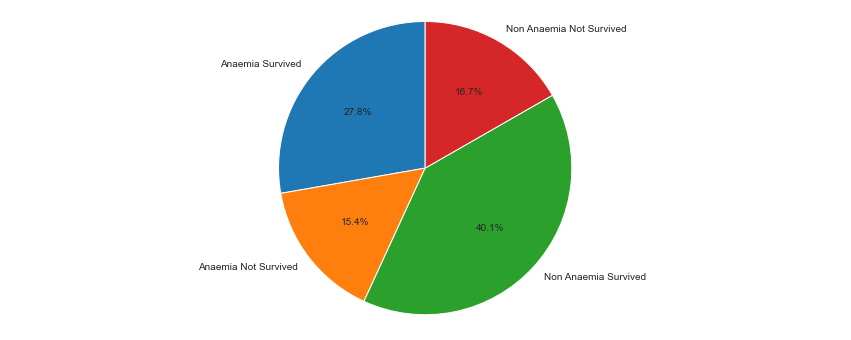

In [34]:
labels = 'Anaemia Survived', 'Anaemia Not Survived', 'Non Anaemia Survived', 'Non Anaemia Not Survived'
sizes = [len(anaemia_surv),len(anaemia_not_surv),len(non_anaemia_surv),len(non_anaemia_not_surv)]

fig1, ax1 = plt.subplots(figsize=(15,6))
ax1.pie(sizes, labels=labels,autopct='%1.1f%%', startangle=90) 
#colors=['deepskyblue','mediumturquoise','mediumaquamarine','seagreen']
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Subjects who did not have anaemia have higher survival rate

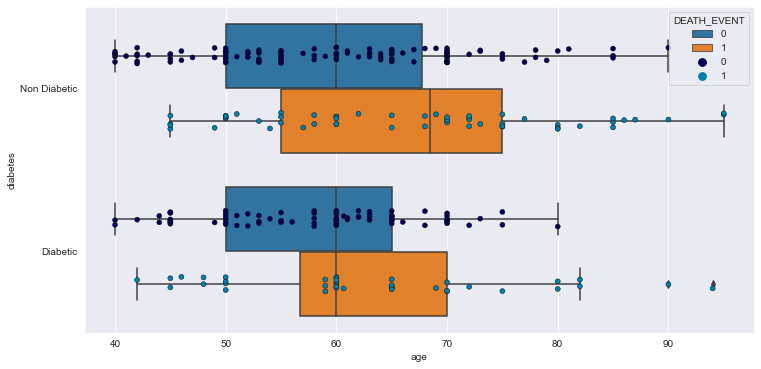

In [35]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(x="age", y="diabetes", data=df_to_plot,hue='DEATH_EVENT')
ax = sns.stripplot(x="age", y="diabetes", data=df_to_plot, palette='ocean',hue='DEATH_EVENT',dodge=True, linewidth=0.5)

Diabetic people seem to be younger than non diabetic people, let's see how they relate to `DEATH_EVENT`

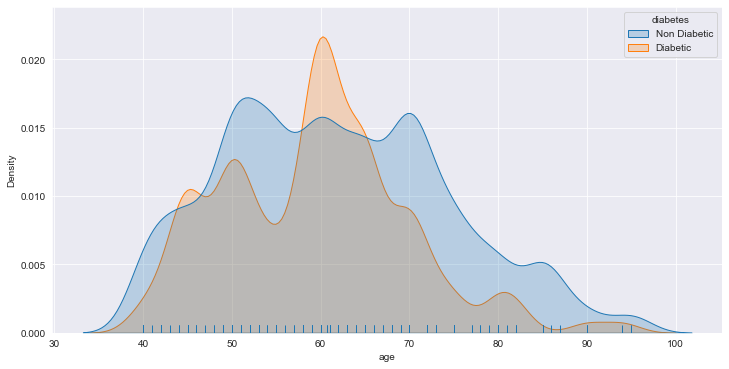

In [36]:
plt.figure(figsize=(12,6))
sns.kdeplot(data=df_to_plot, x="age",shade=True,hue='diabetes',bw_adjust=0.5)
sns.rugplot(df_to_plot['age'])

<Figure size 864x432 with 0 Axes>

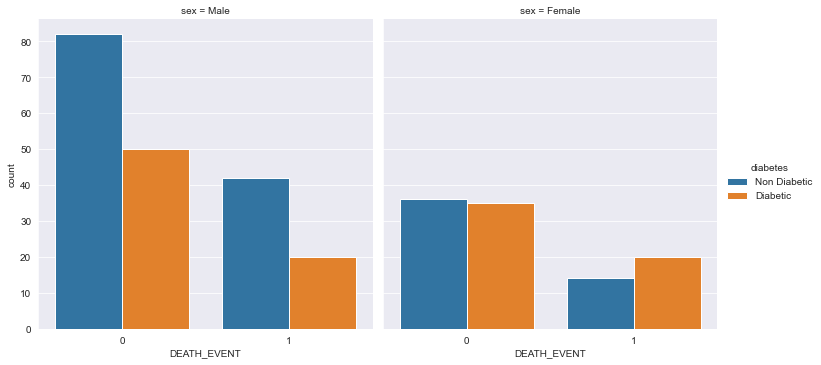

In [37]:
plt.figure(figsize=(12,6))
g = sns.catplot(x="DEATH_EVENT", hue="diabetes", col="sex",
                data=df_to_plot, kind="count")

In [38]:
# Obtain "Diabetic" and "Non Diabetic" subjects
diabetic = df_to_plot[df_to_plot['diabetes']=="Diabetic"]
non_diabetic = df_to_plot[df_to_plot['diabetes']=="Non Diabetic"]

# Obtain "Anaemia" death events
diabetic_surv = diabetic[diabetic['DEATH_EVENT']==0]
diabetic_not_surv = diabetic[diabetic['DEATH_EVENT']==1]

# Obtain "Non Anaemia" death events
non_diabetic_surv = non_diabetic[non_diabetic['DEATH_EVENT']==0]
non_diabetic_not_surv = non_diabetic[non_diabetic['DEATH_EVENT']==1]

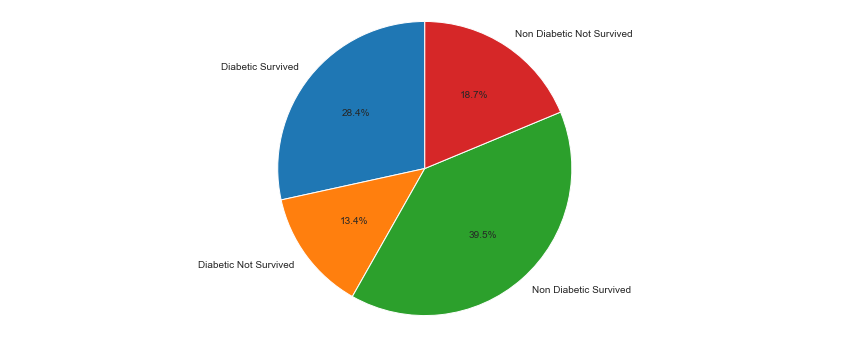

In [39]:
labels = 'Diabetic Survived', 'Diabetic Not Survived', 'Non Diabetic Survived', 'Non Diabetic Not Survived'
sizes = [len(diabetic_surv),len(diabetic_not_surv),len(non_diabetic_surv),len(non_diabetic_not_surv)]

fig1, ax1 = plt.subplots(figsize=(15,6))
ax1.pie(sizes, labels=labels,autopct='%1.1f%%', startangle=90) 
#colors=['deepskyblue','mediumturquoise','mediumaquamarine','seagreen']
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Being non diabetic increases your chances of survival

Lets now take a look at the the other numerical features and see their distribution

Lets look at the `DEATH_EVENT` distribution through our age column

In [40]:
df_to_plot['age'].unique()

array([75.   , 55.   , 65.   , 50.   , 90.   , 60.   , 80.   , 62.   ,
       45.   , 49.   , 82.   , 87.   , 70.   , 48.   , 68.   , 53.   ,
       95.   , 58.   , 94.   , 85.   , 69.   , 72.   , 51.   , 57.   ,
       42.   , 41.   , 67.   , 79.   , 59.   , 44.   , 63.   , 86.   ,
       66.   , 43.   , 46.   , 61.   , 81.   , 52.   , 64.   , 40.   ,
       60.667, 73.   , 77.   , 78.   , 54.   , 47.   , 56.   ])

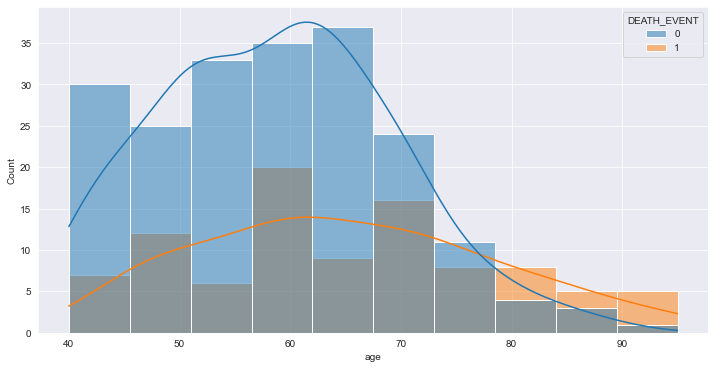

In [41]:
plt.figure(figsize=(12,6))
sns.histplot(data=df_to_plot,x='age',hue='DEATH_EVENT',kde=True)

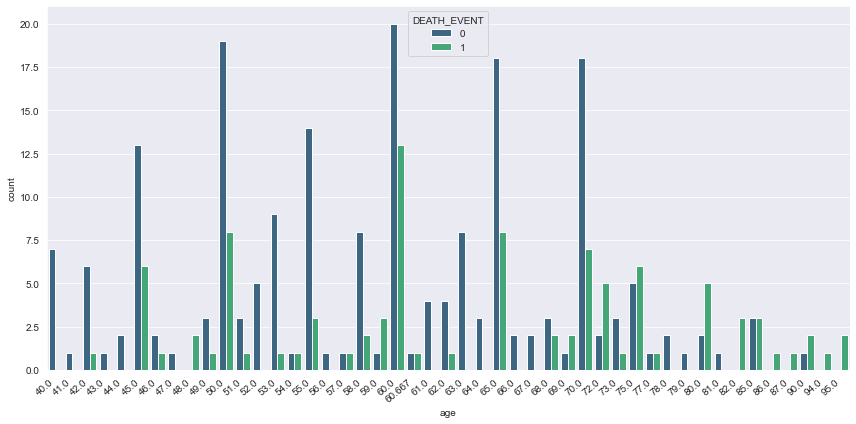

In [42]:
plt.figure(figsize=(12,6))
ax = sns.countplot(data=df_to_plot.sort_values(by='age'), x="age",hue='DEATH_EVENT',palette='viridis')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [43]:
df_to_plot.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

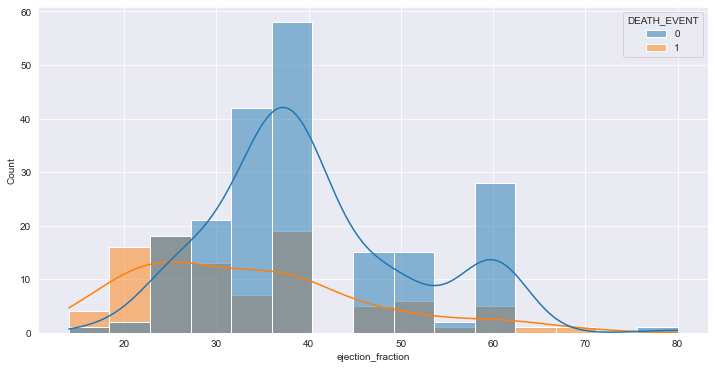

In [44]:
plt.figure(figsize=(12,6))
sns.histplot(data=df_to_plot,x='ejection_fraction',hue='DEATH_EVENT',kde=True)

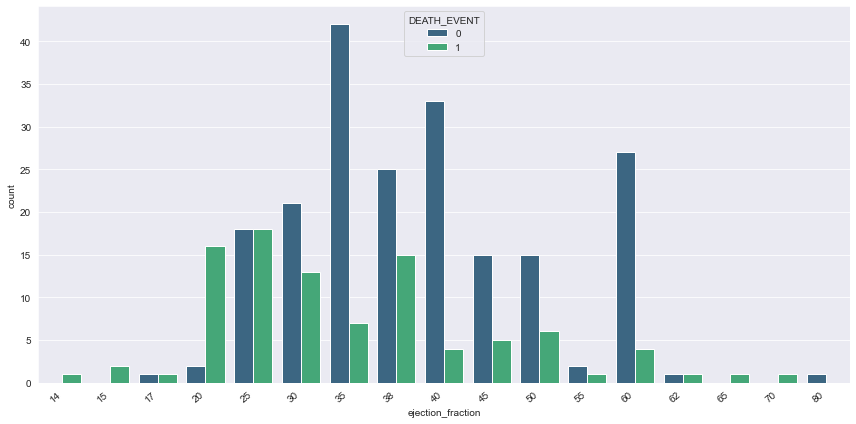

In [45]:
plt.figure(figsize=(12,6))
ax = sns.countplot(data=df_to_plot.sort_values(by='ejection_fraction'), x="ejection_fraction",hue='DEATH_EVENT',palette='viridis')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

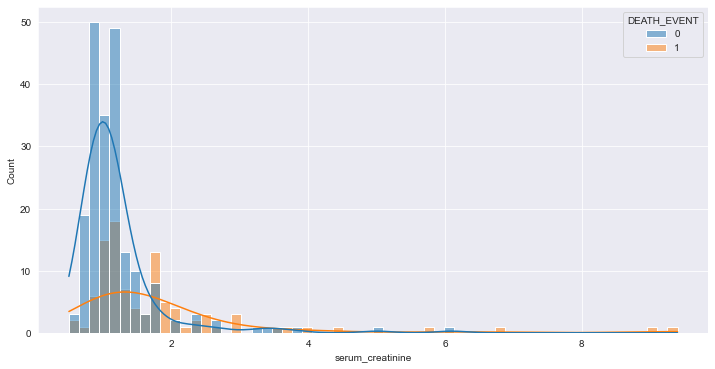

In [46]:
plt.figure(figsize=(12,6))
sns.histplot(data=df_to_plot,x='serum_creatinine',hue='DEATH_EVENT',kde=True)

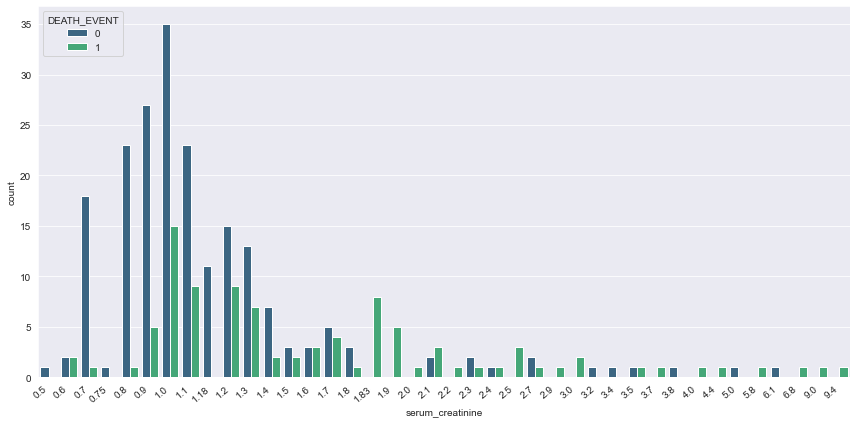

In [47]:
plt.figure(figsize=(12,6))
ax = sns.countplot(data=df_to_plot.sort_values(by='serum_creatinine'), x="serum_creatinine",hue='DEATH_EVENT',palette='viridis')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

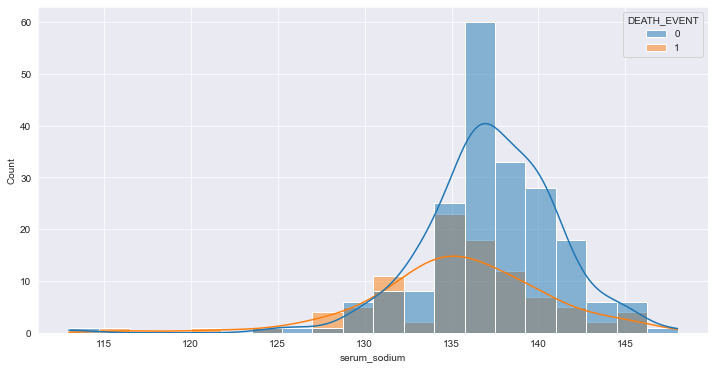

In [48]:
plt.figure(figsize=(12,6))
sns.histplot(data=df_to_plot,x='serum_sodium',hue='DEATH_EVENT',kde=True)

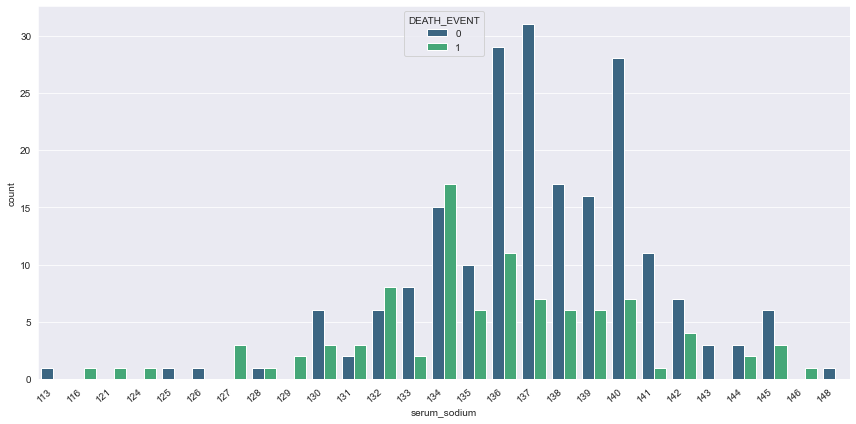

In [49]:
plt.figure(figsize=(12,6))
ax = sns.countplot(data=df_to_plot.sort_values(by='serum_sodium'), x="serum_sodium",hue='DEATH_EVENT',palette='viridis')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

Let's see if we have any correlated variables in our dataset, and lets plot them if we haven´t already

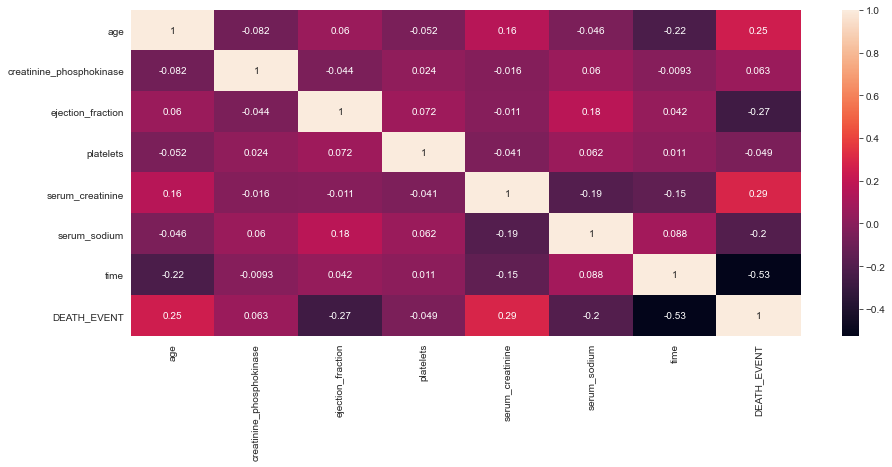

In [50]:
plt.figure(figsize=(15,6))
sns.heatmap(data=df_to_plot.corr(),annot=True)

It seems "time" is highly correlated with "DEATH_EVENT" and also a little "age", let's do a scatterplot to visualize them

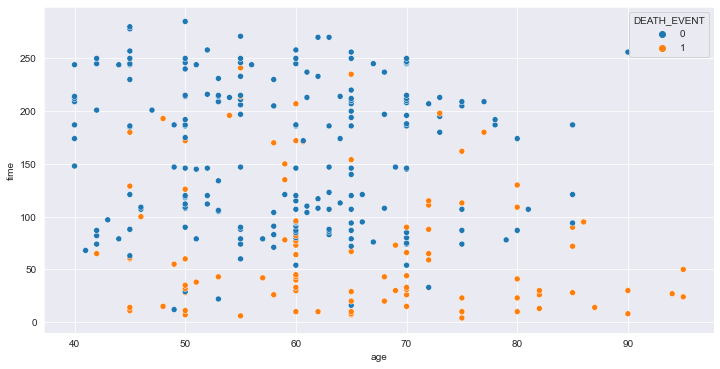

In [51]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df_to_plot,x='age',y='time',hue='DEATH_EVENT')

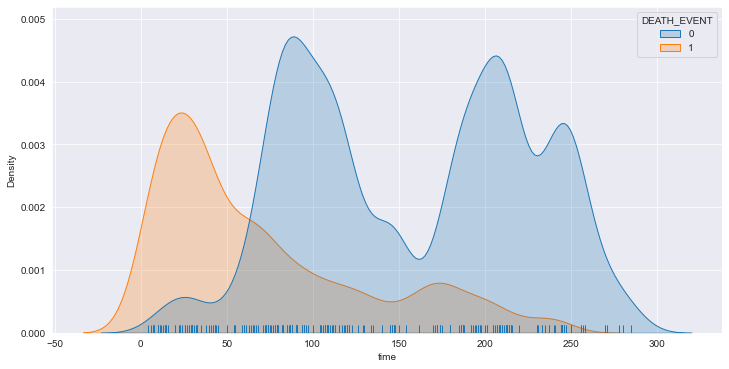

In [52]:
plt.figure(figsize=(12,6))
sns.kdeplot(data=df_to_plot, x="time",shade=True,hue='DEATH_EVENT',bw_adjust=0.5)
sns.rugplot(df_to_plot['time'])

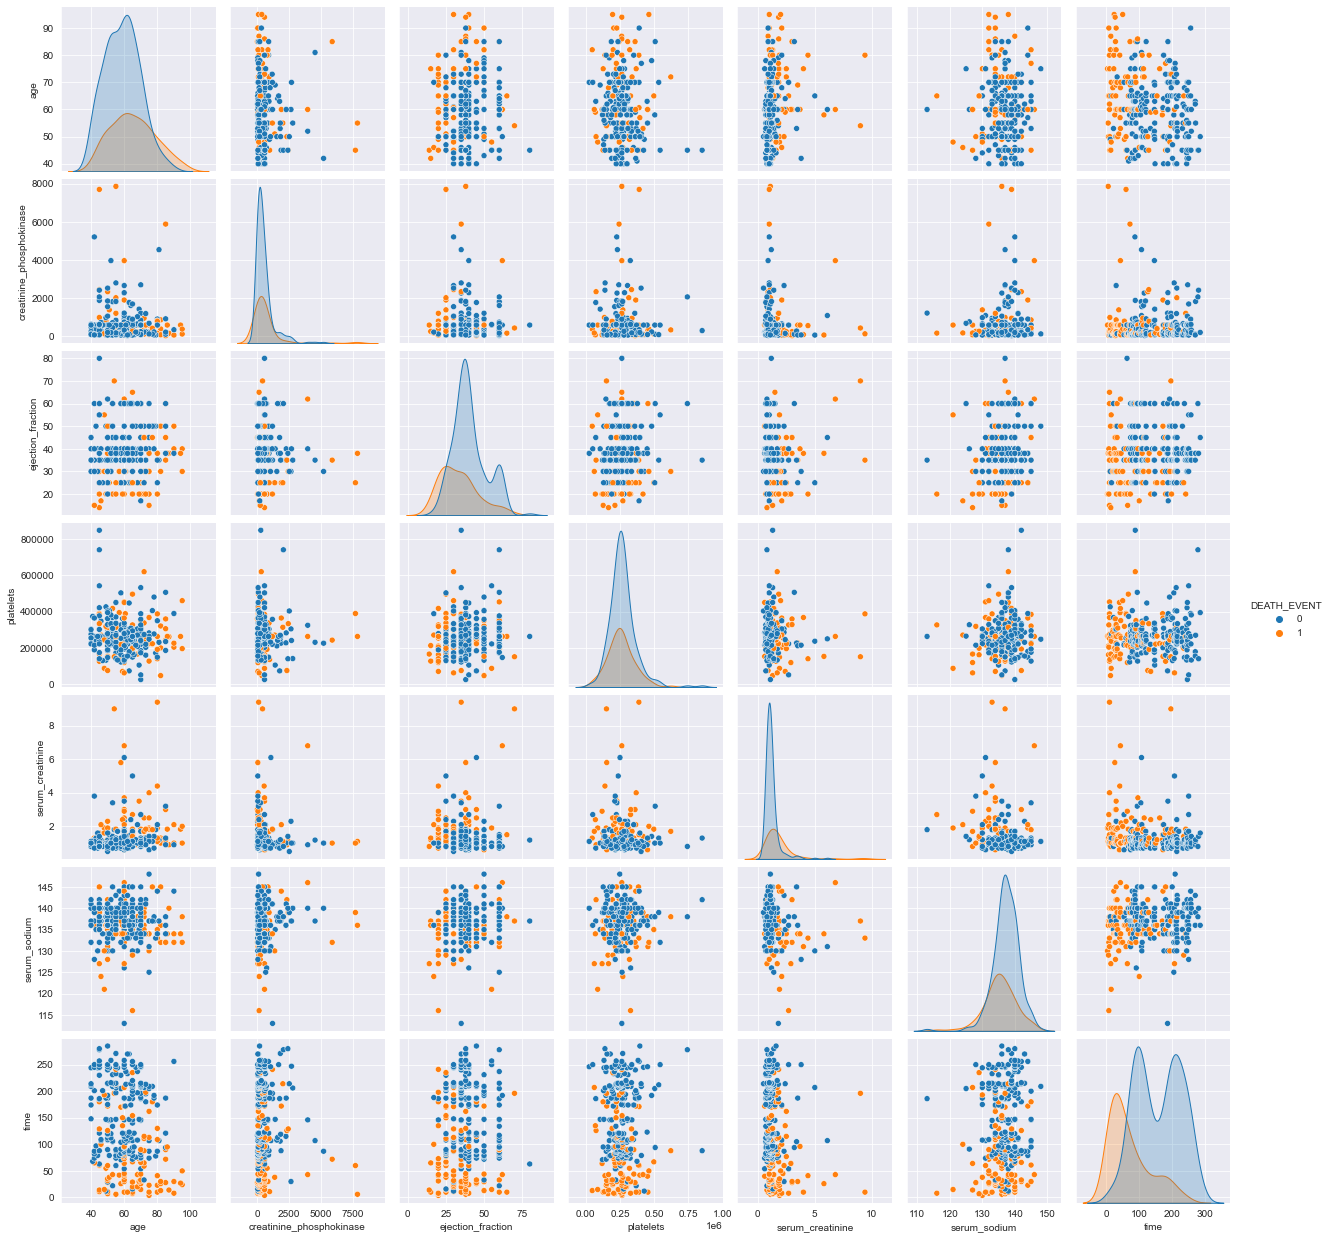

In [53]:
sns.pairplot(data=df_to_plot, hue='DEATH_EVENT')

In [54]:
# Hacer algortimos de ML
#del df_to_plot

In [55]:
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,f1_score
from sklearn.model_selection import GridSearchCV

In [56]:
# ML Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [57]:
# Test ML models
KNN = KNeighborsClassifier()
DT = DecisionTreeClassifier()
RF = RandomForestClassifier()
SV = SVC()
LR = LogisticRegression()

In [58]:
X = df[['time','ejection_fraction','serum_creatinine']]
y = df['DEATH_EVENT']
accuracy_list = []
f1_score_list = []

In [59]:
Scaler = StandardScaler()
#Scaler = MinMaxScaler()
X = Scaler.fit_transform(X)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [61]:
# KNN
param_grid = {'n_neighbors':[1,3,5,7,9]}
grid = GridSearchCV(KNN,param_grid,verbose=0)
grid.fit(X_train,y_train)
KNN_grid_prediction = grid.predict(X_test)

In [62]:
grid.best_params_

{'n_neighbors': 5}

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        45
           1       0.93      0.87      0.90        15

    accuracy                           0.95        60
   macro avg       0.94      0.92      0.93        60
weighted avg       0.95      0.95      0.95        60



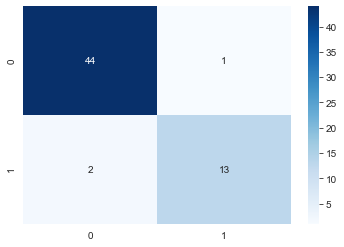

In [63]:
# KNN
KNN_cf_matrix = confusion_matrix(y_test,KNN_grid_prediction)
KNN_accuracy = accuracy_score(y_test,KNN_grid_prediction)
KNN_f1_score = f1_score(y_test,KNN_grid_prediction)
accuracy_list.append(KNN_accuracy)
f1_score_list.append(KNN_f1_score)
print(classification_report(y_test,KNN_grid_prediction))
sns.heatmap(KNN_cf_matrix, annot=True,cmap='Blues')

In [64]:
# Decision Tree
DT.fit(X_train,y_train)
DT_predictions = DT.predict(X_test)

              precision    recall  f1-score   support

           0       0.91      0.89      0.90        45
           1       0.69      0.73      0.71        15

    accuracy                           0.85        60
   macro avg       0.80      0.81      0.80        60
weighted avg       0.85      0.85      0.85        60



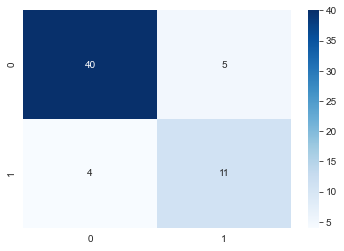

In [65]:
# Decision Tree
DT_cf_matrix = confusion_matrix(y_test,DT_predictions)
DT_accuracy = accuracy_score(y_test,DT_predictions)
DT_f1_score = f1_score(y_test,DT_predictions)
accuracy_list.append(DT_accuracy)
f1_score_list.append(DT_f1_score)
print(classification_report(y_test,DT_predictions))
sns.heatmap(DT_cf_matrix, annot=True,cmap='Blues')

In [66]:
# Random Forest
param_grid = {'n_estimators':[50,100,200,300]}
grid = GridSearchCV(RF,param_grid,verbose=0)
grid.fit(X_train,y_train)
RF_grid_prediction = grid.predict(X_test)
print(grid.best_params_)

{'n_estimators': 200}


              precision    recall  f1-score   support

           0       0.91      0.91      0.91        45
           1       0.73      0.73      0.73        15

    accuracy                           0.87        60
   macro avg       0.82      0.82      0.82        60
weighted avg       0.87      0.87      0.87        60



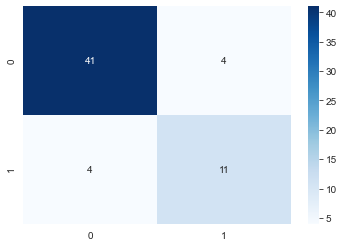

In [67]:
# Random Forest
RF_cf_matrix = confusion_matrix(y_test,RF_grid_prediction)
RF_accuracy = accuracy_score(y_test,RF_grid_prediction)
RF_f1_score = f1_score(y_test,RF_grid_prediction)
accuracy_list.append(RF_accuracy)
f1_score_list.append(RF_f1_score)
print(classification_report(y_test,RF_grid_prediction))
sns.heatmap(RF_cf_matrix, annot=True,cmap='Blues')

In [68]:
# SVM
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid = GridSearchCV(SV,param_grid,refit=True,verbose=3)
grid.fit(X_train,y_train)
SVC_grid_prediction = grid.predict(X_test)
print(grid.best_params_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.708, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.750, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.792, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.729, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.745, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.729, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.667, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.646, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.660, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.667, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.667, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.667, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.646, total=   0.0s
[CV] 

[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.660, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.750, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.771, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.771, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.792, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.809, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.854, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    1.6s finished


              precision    recall  f1-score   support

           0       0.93      0.87      0.90        45
           1       0.67      0.80      0.73        15

    accuracy                           0.85        60
   macro avg       0.80      0.83      0.81        60
weighted avg       0.86      0.85      0.85        60



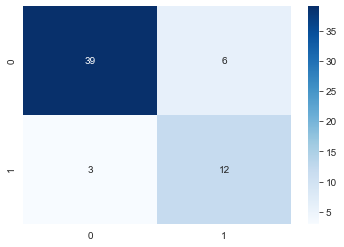

In [69]:
# SVM
SVC_cf_matrix = confusion_matrix(y_test,SVC_grid_prediction)
SVC_accuracy = accuracy_score(y_test,SVC_grid_prediction)
SVC_f1_score = f1_score(y_test,SVC_grid_prediction)
accuracy_list.append(SVC_accuracy)
f1_score_list.append(SVC_f1_score)
print(classification_report(y_test,SVC_grid_prediction))
sns.heatmap(SVC_cf_matrix, annot=True,cmap='Blues')

In [70]:
# Logistic Regresison
LR.fit(X_train,y_train)
LR_predict = LR.predict(X_test)

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        45
           1       0.80      0.80      0.80        15

    accuracy                           0.90        60
   macro avg       0.87      0.87      0.87        60
weighted avg       0.90      0.90      0.90        60



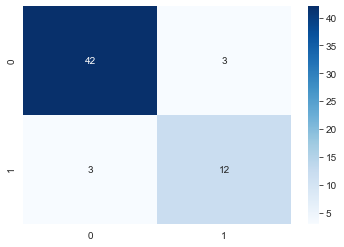

In [71]:
# Logistic Regression
LR_cf_matrix = confusion_matrix(y_test,LR_predict)
LR_accuracy = accuracy_score(y_test,LR_predict)
LR_f1_score = f1_score(y_test,LR_predict)
accuracy_list.append(LR_accuracy)
f1_score_list.append(LR_f1_score)
print(classification_report(y_test,LR_predict))
sns.heatmap(LR_cf_matrix, annot=True,cmap='Blues')

In [72]:
accuracy_list

[0.95, 0.85, 0.8666666666666667, 0.85, 0.9]

In [73]:
f1_score_list

[0.896551724137931,
 0.7096774193548386,
 0.7333333333333333,
 0.7272727272727272,
 0.8000000000000002]

In [74]:
accuracy_df = pd.DataFrame(data={'Accuracy': accuracy_list,'F1_Score': f1_score_list},index=['KNN','DT','RF','SVM','LR'])

In [75]:
accuracy_df = accuracy_df*100

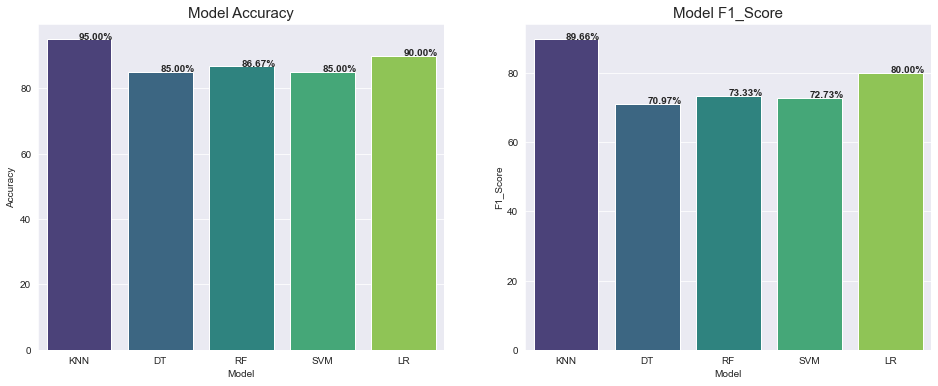

In [78]:
bar,ax = plt.subplots(1,2,figsize=(16,6))
# Accuracy
sns.barplot(ax=ax[0],x=accuracy_df.index, y='Accuracy', data=accuracy_df, ci=None, palette="viridis",orient='v', )
ax[0].set_title("Model Accuracy", fontsize=15)
ax[0].set_xlabel ("Model")
ax[0].set_ylabel ("Accuracy")
# calculate the percentages
for rect in ax[0].patches:
    ax[0].text ((rect.get_x() + rect.get_width() / 2),rect.get_height(),"%.2f%%"% rect.get_height(), weight='bold' )

# F1_Score
sns.barplot(ax=ax[1],x=accuracy_df.index, y='F1_Score', data=accuracy_df, ci=None, palette="viridis",orient='v', )
ax[1].set_title("Model F1_Score", fontsize=15)
ax[1].set_xlabel ("Model")
ax[1].set_ylabel ("F1_Score")
# calculate the percentages
for rect in ax[1].patches:
    ax[1].text ((rect.get_x() + rect.get_width() / 2),rect.get_height(),"%.2f%%"% rect.get_height(), weight='bold' )